# Intro

GROUP 5

Giammarco Bozzelli,
Balthazar Duc,
Giulia Facchini,
Camille Vermenouze.

In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.optimize as sco

In [ ]:
#Take final dataset

df_EUR_M_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_capitalization.csv')
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_return.csv')
df_EUR_Y_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_capitalization.csv')
df_EUR_Y_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/df_EUR_yearly_return.csv')

df_E_score=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/DS_EScore_Y.csv')


Variable name :


df_EUR_M_cap : Monthly capitalization for EUR firms

df_EUR_M_RI: Monthly return index for EUR firms

df_EUR_Y_cap: Yearly capitalization for EUR firms

df_EUR_Y_RI: Yearly return index for EUR firms

df_M_returns: Monthly returns (computed with capitalization) for EUR firms

df_M_returns_annualized: Monthly returns annualized

df_M_volatility: Monthly volatility of EUR firms

df_M_volatility_annualized: Monthly volatility annualized



# Question 1

## Annualized average return

In [ ]:
df_EUR_M_RI.set_index('NAME', inplace = True)
df_EUR_M_cap.set_index('NAME', inplace = True)

In [ ]:

df_EUR_M_RI.drop(df_EUR_M_RI.columns[:4], axis=1, inplace=True)

df_EUR_M_RI.columns = pd.to_datetime(df_EUR_M_RI.columns)

df_EUR_M_RI_08 = df_EUR_M_RI.loc[:, (df_EUR_M_RI.columns >= pd.to_datetime("2007-01-01"))]

df_EUR_M_RI_T = df_EUR_M_RI_08.T

In [ ]:
df_M_returns = df_EUR_M_RI_T.pct_change()

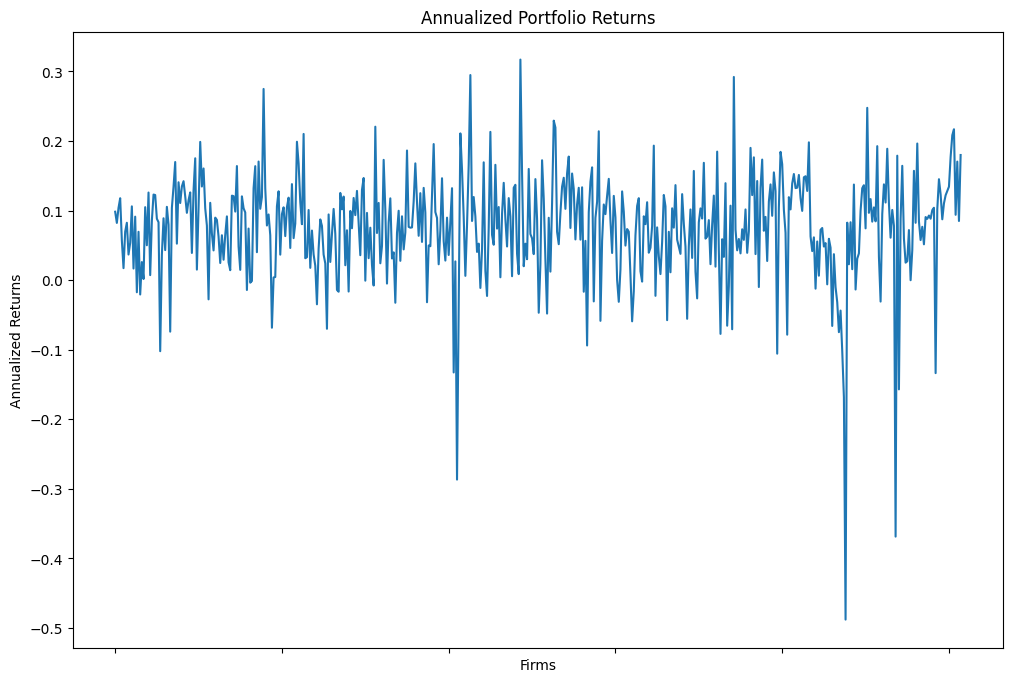

In [ ]:
#Now we annualized it
df_M_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
df_M_returns_annualized = df_M_returns.mean() * 12
#And we plot it
plt.figure(figsize=(12, 8))  # Adjust the dimensions as needed
df_M_returns_annualized.plot()
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel('Firms')
plt.ylabel('Annualized Returns')
plt.title('Annualized Portfolio Returns')
plt.show()

Text(0.5, 1.0, 'Annualized Portfolio Returns')

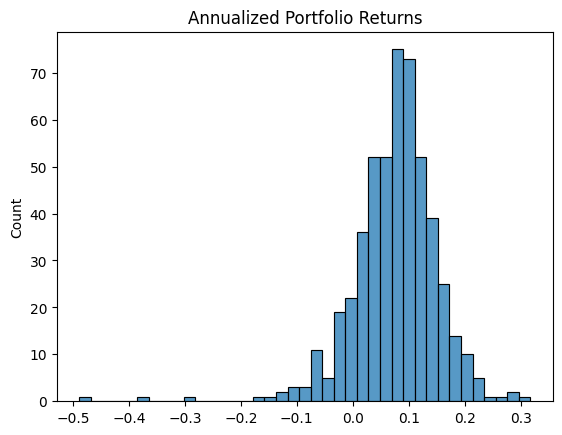

In [ ]:
sns.histplot(df_M_returns_annualized)
plt.title('Annualized Portfolio Returns')

## Annualized volatility

In [ ]:
deviations = df_M_returns - df_M_returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

df_M_volatility = np.sqrt(mean_squared_deviations)

In [ ]:
df_M_volatility_annualized = df_M_volatility*(12**0.5)

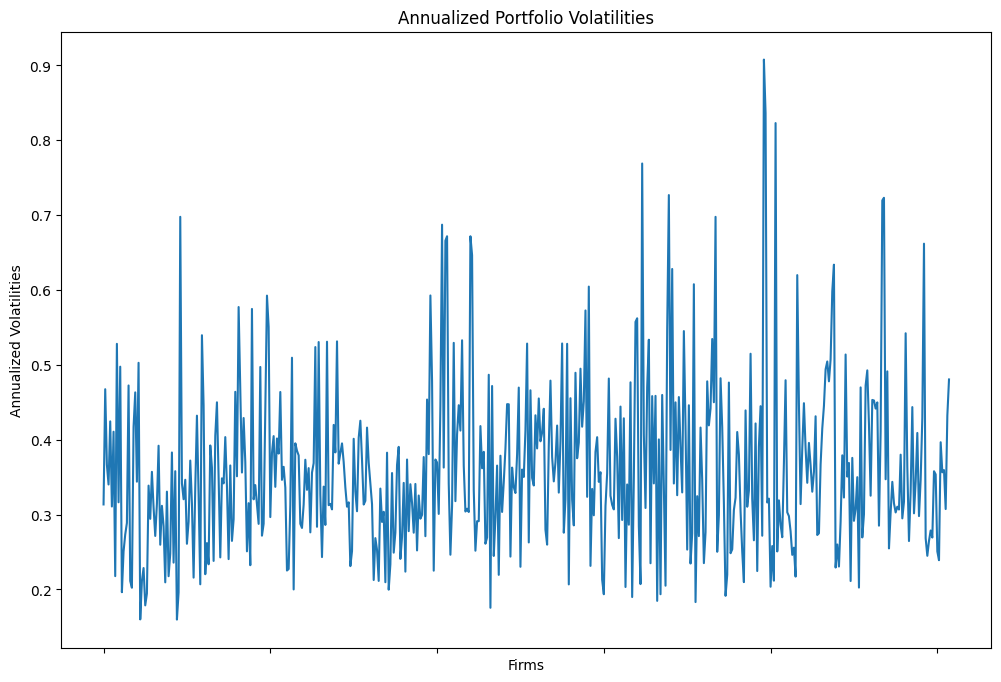

In [ ]:
plt.figure(figsize=(12, 8))
df_M_volatility_annualized.plot()
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel('Firms')
plt.ylabel('Annualized Volatilities')
plt.title('Annualized Portfolio Volatilities')
plt.show()

<Axes: ylabel='Count'>

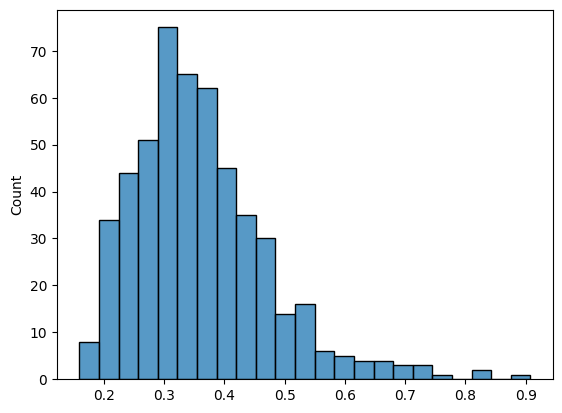

In [ ]:
sns.histplot(df_M_volatility_annualized)

## Correlation

In [ ]:
df_M_returns.corr()

NAME,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,NIBE INDUSTRIER,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,1.000000,0.563011,0.501616,0.499605,0.471449,0.623572,0.461207,0.563928,0.466917,0.491600,...,0.371786,0.422274,0.468797,0.285513,0.389913,0.334352,0.395925,0.395054,0.453418,0.334718
ERSTE GROUP BANK,0.563011,1.000000,0.601695,0.527919,0.612858,0.730205,0.529561,0.575977,0.516212,0.693561,...,0.462065,0.521617,0.661790,0.362114,0.532283,0.368265,0.508907,0.536500,0.503673,0.567557
OMV,0.501616,0.601695,1.000000,0.481892,0.437129,0.566825,0.550988,0.576954,0.516486,0.637158,...,0.413331,0.473772,0.480426,0.356773,0.411133,0.322863,0.426079,0.443856,0.421563,0.488802
VERBUND,0.499605,0.527919,0.481892,1.000000,0.410817,0.533057,0.475076,0.482957,0.436344,0.469756,...,0.439132,0.476935,0.525412,0.299445,0.438822,0.351009,0.317555,0.401171,0.375623,0.383349
WIENERBERGER,0.471449,0.612858,0.437129,0.410817,1.000000,0.627346,0.615369,0.528778,0.520221,0.652811,...,0.563730,0.608841,0.663237,0.251434,0.561712,0.518141,0.586415,0.621444,0.564434,0.434293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NIBE INDUSTRIER,0.334352,0.368265,0.322863,0.351009,0.518141,0.447080,0.435842,0.399629,0.406543,0.409717,...,0.466596,0.538200,0.577069,0.276464,0.570899,1.000000,0.449978,0.549947,0.424562,0.372856
ELECTROLUX B,0.395925,0.508907,0.426079,0.317555,0.586415,0.537329,0.570320,0.451120,0.441172,0.566379,...,0.512637,0.520470,0.671834,0.336836,0.645958,0.449978,1.000000,0.658460,0.475527,0.555120
ATLAS COPCO A,0.395054,0.536500,0.443856,0.401171,0.621444,0.596458,0.673897,0.521670,0.515376,0.641485,...,0.640817,0.631429,0.806049,0.335394,0.745823,0.549947,0.658460,1.000000,0.613623,0.639032


In [ ]:
# Calculate the average returns for each asset
average_returns = df_M_returns.mean()

# Calculate the volatility (standard deviation) for each asset
volatilities = df_M_returns.std()

# Compute the correlation between average returns and volatilities
correlation = average_returns.corr(volatilities)
correlation

-0.2681976271125755

# Question 2

## Equally weighted portfolio

In [ ]:
#Creating a vector with equal weights for the 508 firms
n_columns = 508

#df_weight = pd.DataFrame([1/n_columns] * n_columns).T

weight = 1/508

weight

0.001968503937007874

In [ ]:
#Equally weighted portfolio (average returns of all firms per each months)
portfolio_returns_EW = (df_M_returns*weight).sum(axis=1)

portfolio_returns_EW.replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio_returns_EW.dropna(inplace=True)

In [ ]:
portfolio_returns_EW.index = pd.to_datetime(portfolio_returns_EW.index)

# Filter DataFrame based on the condition
filtered_df = portfolio_returns_EW['2007-12-31':]

In [ ]:
EW_returns = filtered_df
EW_returns = EW_returns.dropna(axis=0)

EW_returns_avrg_ann = EW_returns.mean()*12
EW_returns_avrg_ann




0.07422517259025155

In [ ]:
EW_returns.min()

-0.2626985100842765

In [ ]:
EW_returns.max()

0.25538103760383973

In [ ]:
portfolio_vol_EW = portfolio_returns_EW.std()*np.sqrt(12)
portfolio_vol_EW

0.22666451290065046

In [ ]:
rf_rate = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')
# Sharpe ratio with average EUR annualized risk free ratio from OECD euro zone

rfr = rf_rate.OBS_VALUE
avg_rfr = rfr.mean()/100

## Sharpe ratio EV_Portfolio

In [ ]:
sr_ev = (EW_returns_avrg_ann - avg_rfr) / portfolio_vol_EW

In [ ]:
sr_ev

0.1973869030924826

## Value weighted portfolio

In [ ]:
df_EUR_M_cap.drop(df_EUR_M_cap.columns[:4], axis=1, inplace=True)

df_EUR_M_cap.columns = pd.to_datetime(df_EUR_M_cap.columns)

df_EUR_M_cap_08 = df_EUR_M_cap.loc[:, (df_EUR_M_cap.columns >= pd.to_datetime("2007-01-01"))]

df_EUR_M_cap_T = df_EUR_M_cap_08.T

weights = df_EUR_M_cap_T.div(df_EUR_M_cap.T.sum(axis=1), axis=0).mean()

weights

NAME
FLUGHAFEN WIEN              0.000249
ERSTE GROUP BANK            0.001761
OMV                         0.001728
VERBUND                     0.000858
WIENERBERGER                0.000300
                              ...   
NIBE INDUSTRIER             0.000544
ELECTROLUX B                0.000851
ATLAS COPCO A               0.002937
MODERN TIMES GROUP MTG B    0.000281
BOLIDEN ORD SHS             0.000692
Length: 508, dtype: float64

In [ ]:
# Calculate weights for each month based on previous month's capitalization

total_cap_previous = df_EUR_M_cap.T.sum(axis=1)
weights = df_EUR_M_cap_T.div(total_cap_previous, axis=0).mean()

# Calculate the value-weighted portfolio returns
portfolio_returns_VW = (df_M_returns* weights).sum(axis=1)


2007-01-31    0.000000
2007-02-28    0.000500
2007-03-31    0.036127
2007-04-30    0.067192
2007-05-31    0.018955
                ...   
2022-08-31   -0.053479
2022-09-30   -0.089615
2022-10-31    0.081919
2022-11-30    0.109852
2022-12-31    0.005090
Length: 192, dtype: float64

In [ ]:
portfolio_returns_VW.index = pd.to_datetime(portfolio_returns_VW.index)

# Filter DataFrame based on the condition
filtered_df = portfolio_returns_VW['2007-12-31':]

In [ ]:
VW_returns = filtered_df
VW_returns_avrg_ann = VW_returns.mean()*12
VW_returns_avrg_ann

0.07263268736039419

In [ ]:
VW_returns.min()

-0.21592185074436043

In [ ]:
VW_returns.max()

0.22372794544005714

In [ ]:
cov_m = df_M_returns.cov()
cov_m

NAME,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,NIBE INDUSTRIER,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.008233,0.006911,0.004828,0.004463,0.005255,0.005089,0.004973,0.003225,0.006474,0.004084,...,0.003494,0.003921,0.003087,0.001792,0.004061,0.003129,0.003736,0.003189,0.005146,0.004223
ERSTE GROUP BANK,0.006911,0.018300,0.008634,0.007031,0.010185,0.008884,0.008513,0.004911,0.010671,0.008591,...,0.006474,0.007221,0.006497,0.003389,0.008265,0.005139,0.007160,0.006456,0.008522,0.010676
OMV,0.004828,0.008634,0.011251,0.005032,0.005696,0.005407,0.006945,0.003857,0.008372,0.006188,...,0.004541,0.005143,0.003698,0.002618,0.005005,0.003533,0.004700,0.004188,0.005593,0.007209
VERBUND,0.004463,0.007031,0.005032,0.009692,0.004968,0.004720,0.005558,0.002996,0.006564,0.004235,...,0.004477,0.004805,0.003754,0.002040,0.004958,0.003564,0.003251,0.003513,0.004625,0.005248
WIENERBERGER,0.005255,0.010185,0.005696,0.004968,0.015092,0.006931,0.008984,0.004094,0.009766,0.007343,...,0.007172,0.007655,0.005913,0.002137,0.007920,0.006566,0.007492,0.006792,0.008673,0.007419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NIBE INDUSTRIER,0.003129,0.005139,0.003533,0.003564,0.006566,0.004148,0.005343,0.002598,0.006409,0.003870,...,0.004985,0.005682,0.004320,0.001973,0.006759,0.010641,0.004828,0.005047,0.005478,0.005348
ELECTROLUX B,0.003736,0.007160,0.004700,0.003251,0.007492,0.005026,0.007049,0.002957,0.007012,0.005394,...,0.005522,0.005540,0.005071,0.002424,0.007711,0.004828,0.010817,0.006092,0.006186,0.008028
ATLAS COPCO A,0.003189,0.006456,0.004188,0.003513,0.006792,0.004772,0.007125,0.002925,0.007006,0.005225,...,0.005904,0.005749,0.005204,0.002064,0.007615,0.005047,0.006092,0.007914,0.006828,0.007905


In [ ]:
portfolio_returns_VW.replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio_returns_VW.dropna(inplace=True)

portfolio_vol_VW = portfolio_returns_VW.std()*np.sqrt(12)
portfolio_vol_VW

0.20272146385466253

In [ ]:
sr_vw = (VW_returns_avrg_ann - avg_rfr) / portfolio_vol_VW

In [ ]:
sr_vw

0.2128443638484298

## Time series of cumulated returns for both portfolio

In [ ]:
# Calculate cumulative returns over time
EW_returns_cumulative = [(1 + EW_returns.iloc[0])]

# Create a loop that calculates the cumulative return per month
for i in range(1, len(EW_returns)):
    EW_returns_cumulative.append(EW_returns_cumulative[i-1] * (1 + EW_returns.iloc[i]))

# Create a DataFrame with 'Date', 'Rp', and 'cumulative_returns' columns
df_cumulative_EW = pd.DataFrame({
    'Date': EW_returns.index,  # Assuming 'Date' is a datetime column in 'clean'
    'EW_returns': EW_returns.values,
    'cumulative_returns': EW_returns_cumulative
})

# Print the resulting DataFrame
df_cumulative_EW

# Calculate cumulative returns over time
VW_returns_cumulative = [(1 + VW_returns.iloc[0])]

# Create a loop that calculates the cumulative return per month
for i in range(1, len(VW_returns)):
    VW_returns_cumulative.append(VW_returns_cumulative[i-1] * (1 + VW_returns.iloc[i]))

# Create a DataFrame with 'Date', 'Rp', and 'cumulative_returns' columns
df_cumulative_VW = pd.DataFrame({
    'Date': VW_returns.index,  # Assuming 'Date' is a datetime column in 'clean'
    'EW_returns': VW_returns.values,
    'cumulative_returns': VW_returns_cumulative
})

# Print the resulting DataFrame
df_cumulative_VW

,Date,EW_returns,cumulative_returns
0,2007-12-31,-0.018092,0.981908
1,2008-01-31,-0.099843,0.883871
2,2008-02-29,0.020849,0.902299
3,2008-03-31,0.017391,0.917992
4,2008-04-30,0.036724,0.951704
...,...,...,...
176,2022-08-31,-0.053479,1.964440
177,2022-09-30,-0.089615,1.788397
178,2022-10-31,0.081919,1.934901
179,2022-11-30,0.109852,2.147454


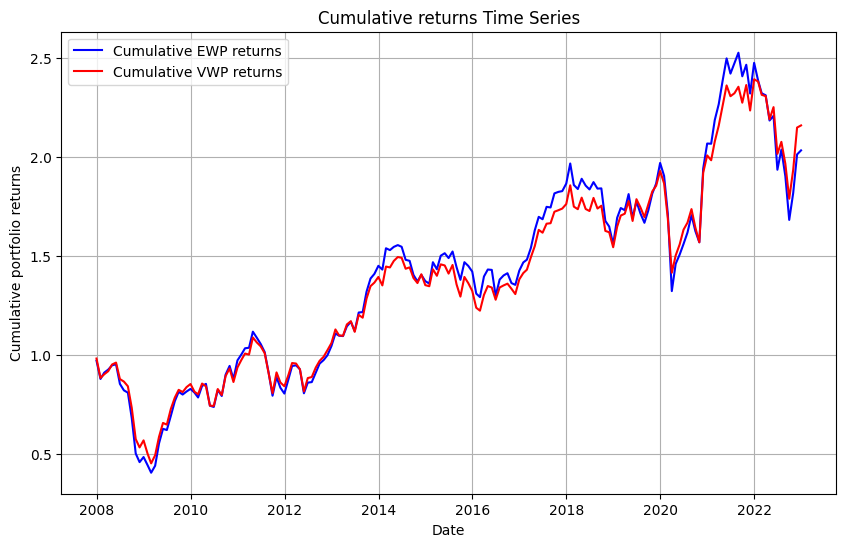

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df_cumulative_EW['Date'], df_cumulative_EW['cumulative_returns'], color='blue', label='Cumulative EWP returns')
plt.plot(df_cumulative_VW['Date'], df_cumulative_VW['cumulative_returns'], color='red', label='Cumulative VWP returns')
plt.title('Cumulative returns Time Series')
plt.xlabel('Date')
plt.ylabel('Cumulative portfolio returns')
plt.legend()
plt.grid(True)
plt.show()

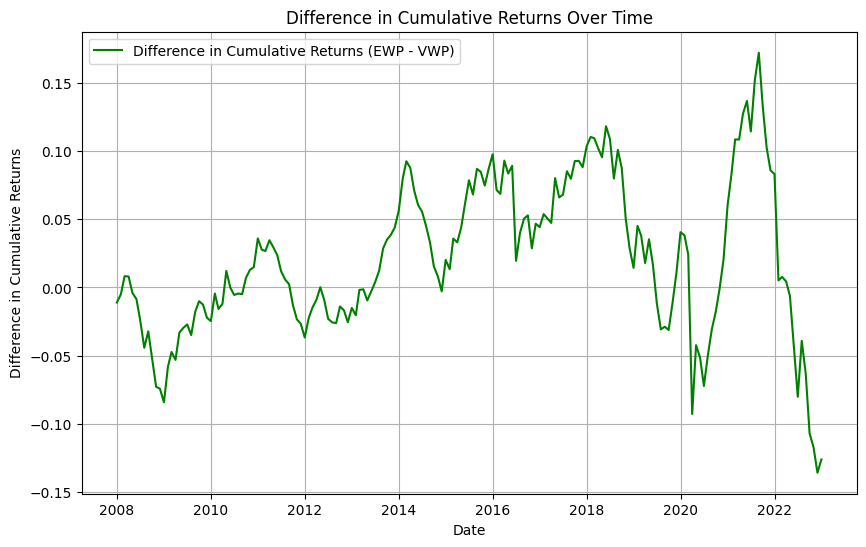

In [ ]:
df_difference = pd.DataFrame()
df_difference['Date'] = df_cumulative_EW['Date']
df_difference['cumulative_returns_difference'] = df_cumulative_EW['cumulative_returns'] - df_cumulative_VW['cumulative_returns']

# Plotting the difference
plt.figure(figsize=(10, 6))
plt.plot(df_difference['Date'], df_difference['cumulative_returns_difference'], color='green', label='Difference in Cumulative Returns (EWP - VWP)')
plt.title('Difference in Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Difference in Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Question 3

## Create the dataset

In [ ]:
#Create a new column with only the 2 first caracters of the column ISIN
df_E_score=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/DS_EScore_Y.csv')
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/ex_2/df_EUR_monthly_RI.csv')

df_E_score['ISIN_First2'] = df_E_score['ISIN'].str[:2]
df_E_score

,ISIN,NAME,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,...,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022,ISIN_First2
0,AN8068571086,SCHLUMBERGER,NaN,NaN,NaN,53.65,23.33,0.00,0.00,40.70,...,75.71,71.54,73.65,85.87,81.71,80.89,78.25,87.80,86.10,AN
1,AT000000STR1,STRABAG SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.69,55.55,56.98,58.49,64.61,62.49,60.42,58.09,56.89,AT
2,AT00000VIE62,FLUGHAFEN WIEN,NaN,NaN,NaN,NaN,18.31,27.55,10.48,4.84,...,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,NaN,AT
3,AT0000606306,RAIFFEISEN BANK INTL.,NaN,NaN,NaN,NaN,NaN,NaN,25.56,23.63,...,73.75,75.14,82.52,82.94,61.29,63.22,61.36,62.62,61.64,AT
4,AT0000652011,ERSTE GROUP BANK,NaN,NaN,NaN,27.08,24.60,25.81,25.56,30.64,...,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,US9839191015,XILINX DEAD - DELIST.15/02/22,NaN,NaN,NaN,0.00,0.00,8.15,0.00,43.23,...,25.88,27.68,38.31,41.42,NaN,56.70,57.38,NaN,NaN,US
1527,US98421M1062,XEROX HOLDINGS,NaN,NaN,NaN,NaN,NaN,NaN,74.94,76.45,...,79.67,85.00,92.80,77.37,74.08,76.22,73.46,77.11,74.54,US
1528,US9884981013,YUM! BRANDS,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,...,66.98,76.89,80.63,80.92,82.19,84.67,88.84,87.72,NaN,US
1529,US98956P1021,ZIMMER BIOMET HDG.,NaN,NaN,NaN,0.00,18.18,24.11,21.85,28.25,...,51.30,54.55,9.37,8.92,13.41,23.33,38.82,38.19,35.17,US


In [ ]:
#Compute the monthly returns of EUR firms
df_EUR_M_RI.set_index('NAME', inplace = True)

df_EUR_M_RI.drop(df_EUR_M_RI.columns[:4], axis=1, inplace=True)

df_EUR_M_RI.columns = pd.to_datetime(df_EUR_M_RI.columns)

#df_EUR_M_RI_08 = df_EUR_M_RI.loc[:, (df_EUR_M_RI.columns >= pd.to_datetime("2007-01-01"))]
df_EUR_M_RI_08 = df_EUR_M_RI.loc[:, ((df_EUR_M_RI.columns >= pd.to_datetime("2007-01-01")) & (df_EUR_M_RI.columns <= ("2021-12-31")))]

df_EUR_M_RI_T = df_EUR_M_RI_08.T

df_M_returns = df_EUR_M_RI_T.pct_change()
#df_M_returns

In [ ]:
#Extract the list of firms that have an Environmental score
firms_list = df_E_score['NAME'].tolist()
#firms_list


In [ ]:
#Get monthly returns of EUR firms with an Environmental score
df_M_returns_E = df_M_returns[df_M_returns.columns.intersection(firms_list)]
#df_M_returns_E

In [ ]:

#Drop the row 2007-01-31 because it has only NaN values
df_M_returns_E = df_M_returns_E.drop('2007-01-31')
#df_M_returns_E

## Average/expected return

In [ ]:
#Compute the average (or expected) returns
avrg_returns = df_M_returns_E.mean()
#avrg_returns

In [ ]:
#The company PROFASE probably dropped out of the market; the change in returns would be infinite, we set it to 0
avrg_returns[avrg_returns == np.inf] = 0

## Covariance matrix

In [ ]:
#Compute the covariance matrix
cov_matrix = df_M_returns_E.cov()
#cov_matrix

## Minimum variance portfolio(MVP)


In [ ]:
#Taking the number of assets
numAssets = len(avrg_returns)

#Function to compute the variance
def min_var(weights):
    weights = np.array(weights)
    var = np.dot(weights.T, np.dot(cov_matrix * 12, weights))
    return var

#Initial conditions: initial weights -> EW and each weight >= 0
initialWeights = np.ones(numAssets)/numAssets
positivity_bounds = tuple((0, 1) for x in range(numAssets))

#Constraint: sum of weights = 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Optimize minimum variance portfolio
result_long_only_gmv_portfolio = sco.minimize(min_var, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)
result_long_only_gmv_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.01178273848802909
       x: [ 1.816e-17  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 16
     jac: [ 4.012e-02  5.912e-02 ...  4.906e-02  4.315e-02]
    nfev: 6784
    njev: 16

In [ ]:
#Compute the minimum variance portfolio
avrg_returns_MVP = np.dot(result_long_only_gmv_portfolio['x'], avrg_returns)
avrg_returns_MVP

0.008174273351819632

In [ ]:
#Compute the annualized MVP
avrg_returns_MVP_ann = avrg_returns_MVP * 12
avrg_returns_MVP_ann

0.09809128022183558

## Maximum return portfolio

In [ ]:
#Function to compute the returns
def max_return(weights):
    weighted_returns = -np.dot(weights, avrg_returns * 12)
    return weighted_returns

#Constraints (same as for the MVP portfolio)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}, {'type': 'ineq', 'fun': lambda x: x})
positivity_bounds = tuple((0, 1) for x in range(numAssets))
initialWeights = np.ones(numAssets)/numAssets

#Optimize maximum return portfolio
result_max_return_portfolio = sco.minimize(max_return, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)
result_max_return_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.32857049300208313
       x: [ 1.086e-15  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 9
     jac: [-9.430e-02 -1.035e-01 ... -7.079e-02 -1.834e-01]
    nfev: 3816
    njev: 9

Check the weights of the maximum return portfolio & result_max_return_portfolio['x']

In [ ]:
#Compute the maximum return portfolio
avrg_returns_MaxRP = np.dot(result_max_return_portfolio['x'], avrg_returns)
avrg_returns_MaxRP

0.027380874416840267

In [ ]:
#Compute the annualized maximum return portfolio
avrg_returns_MaxRP_ann = avrg_returns_MaxRP * 12
avrg_returns_MaxRP_ann

0.3285704930020832

## Minimum return portfolio

In [ ]:
#Function to compute the returns
def min_return(weights):
    weight_returns = np.dot(weights, avrg_returns * 12)
    return weight_returns

#Constraints
numAssets = len(avrg_returns)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
positivity_bounds = tuple((0, 1) for x in range(numAssets))
initialWeights = np.array(numAssets*[1/numAssets])

#Optimize minimum return portfolio
result_min_return_portfolio = sco.minimize(min_return, initialWeights, method='SLSQP', bounds= positivity_bounds, constraints=cons)
result_min_return_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.4149087840273463
       x: [ 1.427e-15  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 6
     jac: [ 9.430e-02  1.035e-01 ...  7.079e-02  1.834e-01]
    nfev: 2544
    njev: 6

In [ ]:
#Compute the minimum return portfolio
avrg_returns_MinRP = np.dot(result_min_return_portfolio['x'], avrg_returns)
avrg_returns_MinRP


-0.034575732002278856

In [ ]:
#Compute the annualized minimum return portfolio
avrg_returns_MinRP_ann = avrg_returns_MinRP * 12
avrg_returns_MinRP_ann

-0.41490878402734627

## Efficient frontier

In [ ]:
#Upper part of the efficient frontier

#Generate an array of evenly spaced target returns between the average return of the MVP and the average return of the max return portfolio
target_returns = np.linspace(avrg_returns_MVP, avrg_returns_MaxRP, 25)

#Initialize an empty list to store all the efficient portfolios to build the efficient frontier, and another for the portfolio weights
efficient_frontier_high = []
portfolio_weights = []

#Define portfolio volatility
def portfolio_volatility(weights):
    return np.sqrt(weights.T @ cov_matrix @ weights)

#Define the return constraint
def return_constraint(weights):
    return (weights @ avrg_returns) - target_return

#Constraints: sum of weights equals 1, portfolio weights * average returns = target return
for target_return in target_returns:
    cons = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': return_constraint})

#Run the optimization
    result = sco.minimize(portfolio_volatility, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)

#Check if optimizer found a solution, if yes add the result (volatility, return)
    if result.success:
        efficient_frontier_high.append((result.fun, target_return))
        portfolio_weights.append(result.x)

#Put the results into a dataframe: it will contain the returns and their minimized volatility
df_frontier_high = pd.DataFrame(efficient_frontier_high, columns=['Volatility', 'Return'])
df_weights_high = pd.DataFrame(portfolio_weights)

In [ ]:
#Lower part of the efficient frontier

#Generate an array of evenly spaced target returns between the average return of the MVP and the average return of the max return portfolio
target_returns = np.linspace(avrg_returns_MVP, avrg_returns_MinRP, 25)

#Initialize an empty list to store all the efficient portfolios to build the efficient frontier, and another for the portfolio weights
efficient_frontier_low = []
portfolio_weights = []

#Define portfolio volatility
def portfolio_volatility(weights):
    return np.sqrt(weights.T @ cov_matrix @ weights)

#Define the return constraint
def return_constraint(weights):
    return (weights @ avrg_returns) - target_return

#Constraints: sum of weights equals 1, portfolio weights * average returns = target return
for target_return in target_returns:
    cons = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': return_constraint})

#Run the optimization
    result = sco.minimize(portfolio_volatility, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)

#Check if optimizer found a solution, if yes add the result (volatility, return)
    if result.success:
        efficient_frontier_low.append((result.fun, target_return))
        portfolio_weights.append(result.x)

#Put the results into a dataframe: it will contain the returns and their minimized volatility
df_frontier_low = pd.DataFrame(efficient_frontier_low, columns=['Volatility', 'Return'])
df_weights_low = pd.DataFrame(portfolio_weights)

In [ ]:
#Concatenate the upper part and lower part of the efficient frontier, same for the weights
df_frontier = pd.concat([df_frontier_high, df_frontier_low]).reset_index(drop=True)
df_weights = pd.concat([df_weights_high, df_weights_low]).reset_index(drop=True)

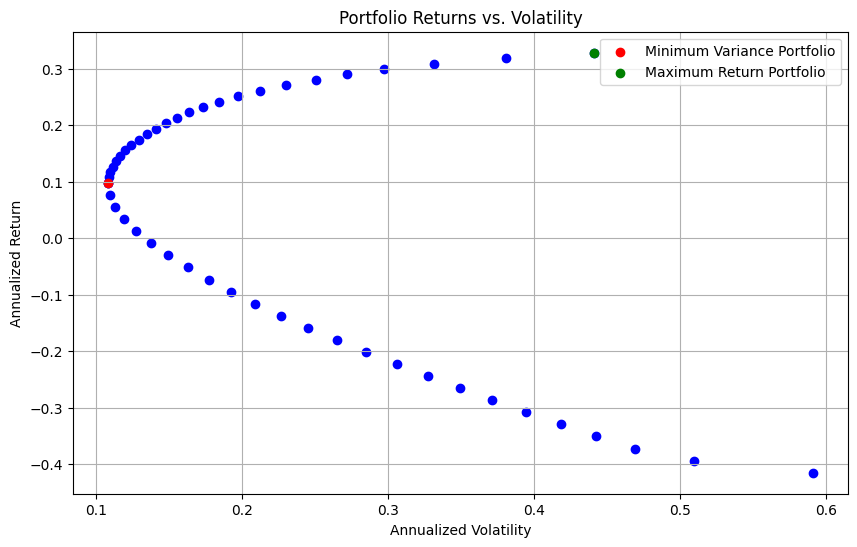

In [ ]:
#Annualize volatility and returns
df_frontier['Annualized Volatility'] = df_frontier['Volatility'] * np.sqrt(12)
df_frontier['Annualized Return'] = df_frontier['Return'] * 12

#Take the index of the MVP and MaxRP
MVP_index = df_frontier['Annualized Volatility'].idxmin()
MaxRP_index = df_frontier['Annualized Return'].idxmax()

#Initialize the figure
plt.figure(figsize=(10, 6))

#Plot the portfolios of the efficient frontier
plt.scatter(df_frontier['Annualized Volatility'], df_frontier['Annualized Return'], color='blue')

#Plot the MVP and the Max return portfolio (MaxRP)
plt.scatter(df_frontier.loc[MVP_index, 'Annualized Volatility'], df_frontier.loc[MVP_index, 'Annualized Return'], color='red', label='Minimum Variance Portfolio')
plt.scatter(df_frontier.loc[MaxRP_index, 'Annualized Volatility'], df_frontier.loc[MaxRP_index, 'Annualized Return'], color='green', label='Maximum Return Portfolio')

#Add title, legends, ect
plt.title('Portfolio Returns vs. Volatility')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

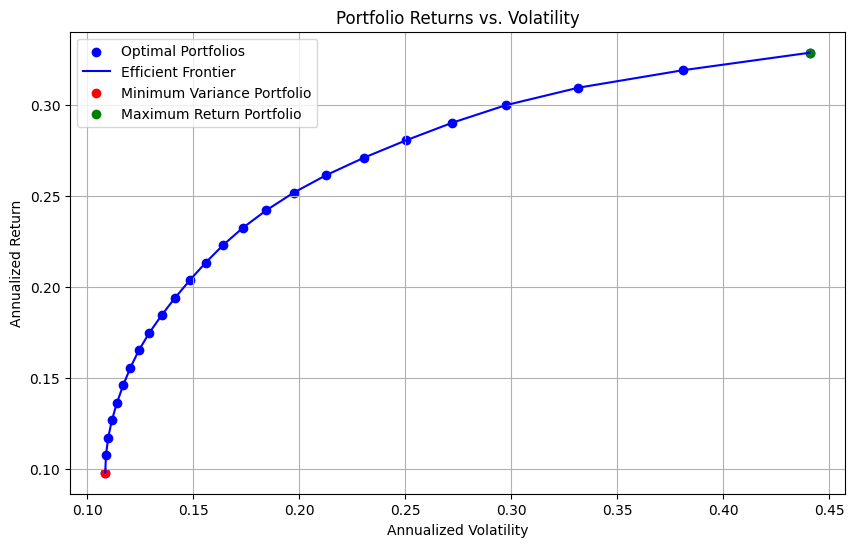

In [ ]:
#Keep only the upper part of the efficient frontier
#Annualize volatility and returns
df_frontier_high['Annualized Volatility'] = df_frontier_high['Volatility'] * np.sqrt(12)
df_frontier_high['Annualized Return'] = df_frontier_high['Return'] * 12

#Take the index of the MVP and MaxRP
MVP_index = df_frontier_high['Annualized Volatility'].idxmin()
MaxRP_index = df_frontier_high['Annualized Return'].idxmax()

#Initialize the figure
plt.figure(figsize=(10, 6))

#Plot the efficient frontier
plt.scatter(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Optimal Portfolios')
plt.plot(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Efficient Frontier')

#Plot the MVP and the Max return portfolio (MaxRP)
plt.scatter(df_frontier_high.loc[MVP_index, 'Annualized Volatility'], df_frontier_high.loc[MVP_index, 'Annualized Return'], color='red', label='Minimum Variance Portfolio')
plt.scatter(df_frontier_high.loc[MaxRP_index, 'Annualized Volatility'], df_frontier_high.loc[MaxRP_index, 'Annualized Return'], color='green', label='Maximum Return Portfolio')

#Add title, legends, ect
plt.title('Portfolio Returns vs. Volatility')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

## Ex-ante

In [ ]:
#Create the risk-free rate
rf = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')
rf.head()

#Get the risk-free rate
rfr = rf.OBS_VALUE
rfr21 = rfr[:-1]

#Average annual risk free rate across all european countries over the 2000-2021 period
rfr_expected = rfr21.mean()/100

In [ ]:
rfr_expected

0.029896900272727275

In [ ]:
#Compute the sharpe ratio for each portfolio on the efficient frontier
df_frontier_high['Sharpe Ratio'] = (df_frontier_high['Annualized Return'] - rfr_expected) / df_frontier_high['Annualized Volatility']

#Find the portfolio with the maximum sharpe ratio
max_sharpe_index = df_frontier_high['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = df_frontier_high.loc[max_sharpe_index]
print(max_sharpe_portfolio)

Volatility               0.044996
Return                   0.017778
Annualized Volatility    0.155869
Annualized Return        0.213331
Sharpe Ratio             1.176847
Name: 12, dtype: float64


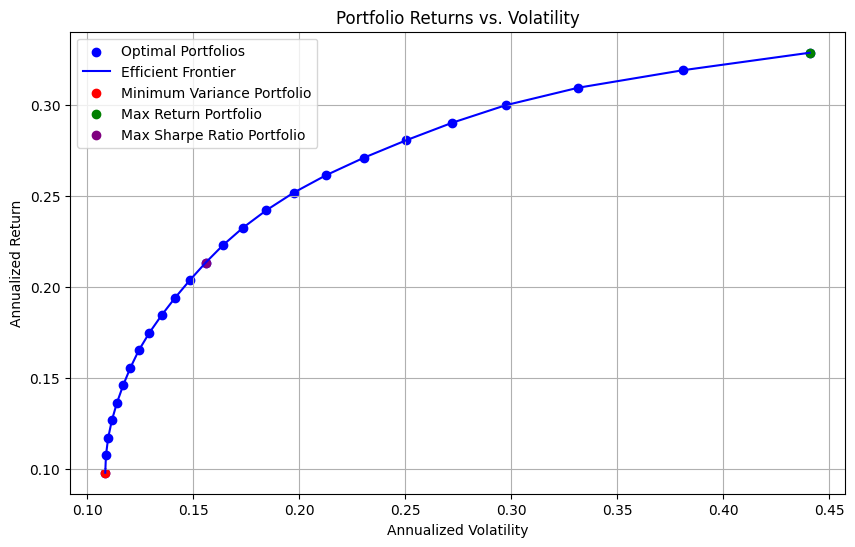

In [ ]:
#Initialize the figure
plt.figure(figsize=(10, 6))

#Plot the efficient frontier
plt.scatter(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Optimal Portfolios')
plt.plot(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Efficient Frontier')

#Plot the MVP, the MaxRP, and the Max Sharpe Ratio Portfolio
plt.scatter(df_frontier_high.loc[MVP_index, 'Annualized Volatility'], df_frontier_high.loc[MVP_index, 'Annualized Return'], color='red', label='Minimum Variance Portfolio')
plt.scatter(df_frontier_high.loc[MaxRP_index, 'Annualized Volatility'], df_frontier_high.loc[MaxRP_index, 'Annualized Return'], color='green', label='Max Return Portfolio')
plt.scatter(df_frontier_high.loc[max_sharpe_index, 'Annualized Volatility'], df_frontier_high.loc[max_sharpe_index, 'Annualized Return'], color='purple', label='Max Sharpe Ratio Portfolio')

#Add title, legends, ect
plt.title('Portfolio Returns vs. Volatility')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()


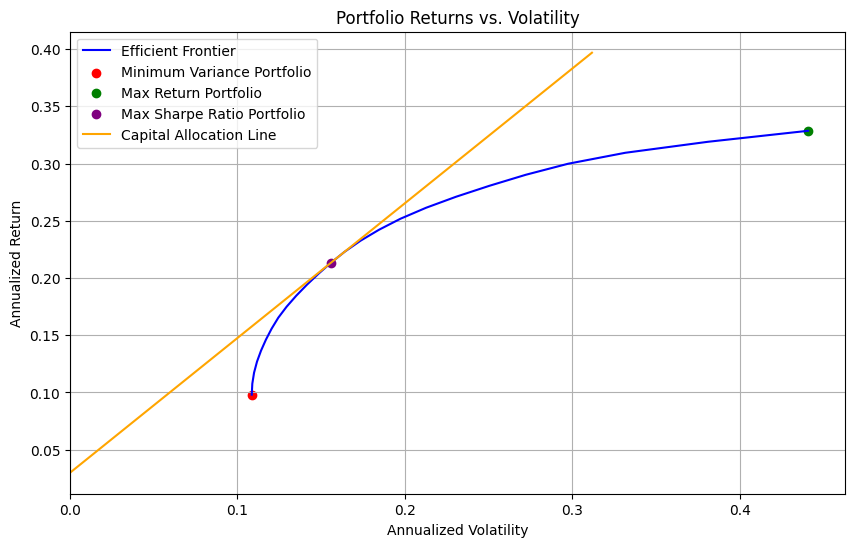

In [ ]:
#Initialize the figure
plt.figure(figsize=(10, 6))

#Get the volatility and the return of the maximum sharpe ratio portfolio
max_sharpe_volatility = df_frontier_high.loc[max_sharpe_index, 'Annualized Volatility']
max_sharpe_return = df_frontier_high.loc[max_sharpe_index, 'Annualized Return']

#Excess return of the Max Sharpe Ratio portfolio over the risk-free rate
max_sharpe_excess_return = max_sharpe_return - rfr_expected

#Get the slope of the capital allocation line (CAL), and the boundaries
CAL_slope = max_sharpe_excess_return / max_sharpe_volatility
CAL_x = max_sharpe_volatility * 2
CAL_y = rfr_expected + (CAL_x * (max_sharpe_return - rfr_expected) / max_sharpe_volatility)

#Plot the efficient frontier
#plt.scatter(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Optimal Portfolios')
plt.plot(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Efficient Frontier')

#Plot the MVP, the MaxRP, and the Max Sharpe Ratio Portfolio
plt.scatter(df_frontier_high.loc[MVP_index, 'Annualized Volatility'], df_frontier_high.loc[MVP_index, 'Annualized Return'], color='red', label='Minimum Variance Portfolio')
plt.scatter(df_frontier_high.loc[MaxRP_index, 'Annualized Volatility'], df_frontier_high.loc[MaxRP_index, 'Annualized Return'], color='green', label='Max Return Portfolio')
plt.scatter(df_frontier_high.loc[max_sharpe_index, 'Annualized Volatility'], df_frontier_high.loc[max_sharpe_index, 'Annualized Return'], color='purple', label='Max Sharpe Ratio Portfolio')

#Plot the capital allocation line (CAL)
plt.plot([0, CAL_x], [rfr_expected, CAL_y], color='orange', label='Capital Allocation Line')

#Add title, legends, ect
plt.xlim(0)
plt.title('Portfolio Returns vs. Volatility')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_frontier_high

,Volatility,Return,Annualized Volatility,Annualized Return,Sharpe Ratio
0,0.031335,0.008174,0.108548,0.098091,0.628239
1,0.031431,0.008975,0.108881,0.107695,0.714519
2,0.031734,0.009775,0.109929,0.117298,0.795069
3,0.032238,0.010575,0.111676,0.126901,0.868623
4,0.032930,0.011375,0.114074,0.136504,0.934549
5,0.033775,0.012176,0.117000,0.146108,0.993258
6,0.034757,0.012976,0.120403,0.155711,1.044943
7,0.035911,0.013776,0.124398,0.165314,1.088582
8,0.037346,0.014576,0.129370,0.174918,1.120973
9,0.039009,0.015377,0.135129,0.184521,1.144266


## Ex-post

In [ ]:
#Compute the returns for EUR firms with an Env score for the year 2022
df_EUR_M_RI.columns = pd.to_datetime(df_EUR_M_RI.columns)

df_EUR_M_RI_22 = df_EUR_M_RI.loc[:, ((df_EUR_M_RI.columns >= pd.to_datetime("2021-12-31")) & (df_EUR_M_RI.columns <= ("2022-12-31")))]

df_EUR_M_RI_T = df_EUR_M_RI_22.T

df_M_returns_22 = df_EUR_M_RI_T.pct_change()

df_M_returns_22_E = df_M_returns_22[df_M_returns_22.columns.intersection(firms_list)]

df_M_returns_22_E = df_M_returns_22_E.drop('2021-12-31')

#Checking if there are inf or NaN values
has_inf = df_M_returns_22_E.isin([float('inf'), float('-inf')]).any().any()
#We find that the company 'PROSAFE' has some
df_M_returns_22_E['PROSAFE']
#Set the inf and NaN values to 0
df_M_returns_22_E.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

#df_M_returns_22_E

In [ ]:
#Concatenate the weights in each row (1 for each of the 25 portfolios) into a single cell and add the portfolio weights in the frontier dataframe
df_frontier_high['Weights'] = df_weights_high.apply(lambda row: np.array(row), axis=1)

df_frontier_high

,Volatility,Return,Annualized Volatility,Annualized Return,Sharpe Ratio,Weights
0,0.031335,0.008174,0.108548,0.098091,0.628239,"[0.0, 8.872288671889502e-17, 0.0, 3.5496338161..."
1,0.031431,0.008975,0.108881,0.107695,0.714519,"[6.136834288949973e-17, 0.0, 1.394676443719877..."
2,0.031734,0.009775,0.109929,0.117298,0.795069,"[0.0, 0.0, 2.095121243538001e-17, 0.0, 0.0, 7...."
3,0.032238,0.010575,0.111676,0.126901,0.868623,"[1.324447998293084e-16, 0.0, 4.622819107345987..."
4,0.032930,0.011375,0.114074,0.136504,0.934549,"[0.0, 3.431061001414283e-17, 0.0, 0.0, 0.0, 4...."
5,0.033775,0.012176,0.117000,0.146108,0.993258,"[6.209203327474031e-17, 1.1883176984135889e-17..."
6,0.034757,0.012976,0.120403,0.155711,1.044943,"[7.589818738438271e-17, 2.9642802661247625e-17..."
7,0.035911,0.013776,0.124398,0.165314,1.088582,"[1.672428956024763e-16, 0.0, 3.154000580940595..."
8,0.037346,0.014576,0.129370,0.174918,1.120973,"[0.0, 0.0, 3.032372357340842e-17, 0.0, 1.59248..."
9,0.039009,0.015377,0.135129,0.184521,1.144266,"[4.75351836831263e-17, 1.2753508604626636e-16,..."


In [ ]:
#Compute the monthly returns of 25 portfolios on the efficient frontier for 2022
M_portfolio_returns_22 = np.dot(df_weights_high, df_M_returns_22_E.T)
M_portfolio_returns_22

array([[-3.92538592e-02,  4.45150176e-02,  2.49027937e-02,
        -3.07571322e-02, -3.13573034e-02, -5.51121466e-02,
         2.83576156e-02, -1.93793399e-02, -7.64573391e-02,
         5.63058255e-02,  6.98697810e-02,  1.08552425e-03],
       [-4.39572996e-02,  4.31974958e-02,  3.07509482e-02,
        -3.46277901e-02, -3.23737797e-02, -5.28200475e-02,
         2.91253550e-02, -1.87662337e-02, -7.45089091e-02,
         5.77545888e-02,  6.76493110e-02,  1.27663268e-03],
       [-4.98400399e-02,  3.94894783e-02,  3.40104618e-02,
        -3.89318406e-02, -3.21038517e-02, -5.17132630e-02,
         3.14099301e-02, -2.04990066e-02, -7.32217663e-02,
         5.98697606e-02,  6.97355178e-02,  1.47541629e-03],
       [-5.66764038e-02,  3.57893047e-02,  3.62257223e-02,
        -4.35109232e-02, -3.34505066e-02, -5.06929746e-02,
         3.42434024e-02, -2.23503912e-02, -7.25289474e-02,
         6.09407742e-02,  7.14498085e-02,  1.96037390e-03],
       [-6.56448827e-02,  3.01313827e-02,  3.8645382

In [ ]:
#Compute the annualized returns of 25 portfolios on the efficient frontier for 2022
ann_portfolio_returns_22 = M_portfolio_returns_22.mean(axis=1) * 12
ann_portfolio_returns_22

array([-0.02728056, -0.02729973, -0.0303192 , -0.03860076, -0.05577048,
       -0.07383834, -0.09050596, -0.10478177, -0.11998529, -0.14029068,
       -0.16793427, -0.1969048 , -0.22458296, -0.2551659 , -0.28211703,
       -0.29690219, -0.29185704, -0.27316112, -0.25622238, -0.24233105,
       -0.23048045, -0.24316599, -0.23766481, -0.22277632, -0.20788784])

In [ ]:
#Compute the covariance matrix for 2022 monthly returns
cov_matrix_22 = df_M_returns_22_E.cov()
#cov_matrix_22

In [ ]:
#Create a list to store the annualized volatility for each portfolio in 2022 (ex-post)
ann_portfolio_volatility_22 = []

#For each weight of each portfolio
for i in range(len(df_weights_high)):
    weights = df_weights_high.iloc[i].values  #Take the weights for each portfolio
    portfolio_volatility = np.sqrt(weights.T @ cov_matrix_22 @ weights) * np.sqrt(12) #Compute the volatility of each portfolio
    ann_portfolio_volatility_22.append(portfolio_volatility) #Append the volatility to the list of annualized volatility

#ann_portfolio_volatility_22 contains the annualized volatility for 2022 for each of the 25 portfolios
#ann_portfolio_volatility_22

In [ ]:
#Store the results and the weights in a dataframe (ex-post values)
df_portfolio_22 = pd.DataFrame({
    'Ex-post Annualized Returns': ann_portfolio_returns_22,
    'Ex-post Annualized Volatility': ann_portfolio_volatility_22,
    'Portfolio Weights': df_weights_high.apply(lambda x: x.tolist(), axis=1)
    })

In [ ]:
#Compute the sharpe ratio
#Create the risk-free rate
rf = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')
rf.head()

#Get the risk-free rate from the dataset
rfr = rf.OBS_VALUE
rfr21 = rfr[:-1]

#Average annual risk free rate across all EUR countries over the 2000-2021 period
rfr_expected = rfr21.mean()/100

In [ ]:
#Compute the sharpe ratio for each portfolio on the efficient frontier
df_portfolio_22['Ex-post Sharpe Ratio'] = (df_portfolio_22['Ex-post Annualized Returns'] - rfr_expected) / df_portfolio_22['Ex-post Annualized Volatility']

#Find the portfolio with the maximum sharpe ratio
expost_max_sharpe_index = df_portfolio_22['Ex-post Sharpe Ratio'].idxmax()
expost_max_sharpe_portfolio = df_portfolio_22.loc[max_sharpe_index]
print(expost_max_sharpe_portfolio)

Ex-post Annualized Returns                                               -0.224583
Ex-post Annualized Volatility                                             0.298512
Portfolio Weights                [6.457619643344112e-17, 0.0, 0.0, 0.0, 8.04144...
Ex-post Sharpe Ratio                                                     -0.852495
Name: 12, dtype: object


In [ ]:
df_frontier_high.head(3)

,Volatility,Return,Annualized Volatility,Annualized Return,Sharpe Ratio,Weights
0,0.031335,0.008174,0.108548,0.098091,0.628239,"[0.0, 8.872288671889502e-17, 0.0, 3.5496338161..."
1,0.031431,0.008975,0.108881,0.107695,0.714519,"[6.136834288949973e-17, 0.0, 1.394676443719877..."
2,0.031734,0.009775,0.109929,0.117298,0.795069,"[0.0, 0.0, 2.095121243538001e-17, 0.0, 0.0, 7...."


In [ ]:
df_portfolio_22.head(3)

,Ex-post Annualized Returns,Ex-post Annualized Volatility,Portfolio Weights,Ex-post Sharpe Ratio
0,-0.027281,0.162232,"[0.0, 8.872288671889502e-17, 0.0, 3.5496338161...",-0.352443
1,-0.027300,0.163099,"[6.136834288949973e-17, 0.0, 1.394676443719877...",-0.350686
2,-0.030319,0.166990,"[0.0, 0.0, 2.095121243538001e-17, 0.0, 0.0, 7....",-0.360596


In [ ]:
#Add a column with an id to both dataframes (need it to merge the dataframes)
df_frontier_high['id'] = df_frontier_high.index
df_portfolio_22['id'] = df_portfolio_22.index

#Merge the 2 dataframes based on the id column
df_final = pd.merge(df_frontier_high, df_portfolio_22, on='id')

#Remove the id column used for the merging
df_final = df_final.drop('id', axis=1)

df_final.head(3)

,Volatility,Return,Annualized Volatility,Annualized Return,Sharpe Ratio,Weights,Ex-post Annualized Returns,Ex-post Annualized Volatility,Portfolio Weights,Ex-post Sharpe Ratio
0,0.031335,0.008174,0.108548,0.098091,0.628239,"[0.0, 8.872288671889502e-17, 0.0, 3.5496338161...",-0.027281,0.162232,"[0.0, 8.872288671889502e-17, 0.0, 3.5496338161...",-0.352443
1,0.031431,0.008975,0.108881,0.107695,0.714519,"[6.136834288949973e-17, 0.0, 1.394676443719877...",-0.027300,0.163099,"[6.136834288949973e-17, 0.0, 1.394676443719877...",-0.350686
2,0.031734,0.009775,0.109929,0.117298,0.795069,"[0.0, 0.0, 2.095121243538001e-17, 0.0, 0.0, 7....",-0.030319,0.166990,"[0.0, 0.0, 2.095121243538001e-17, 0.0, 0.0, 7....",-0.360596


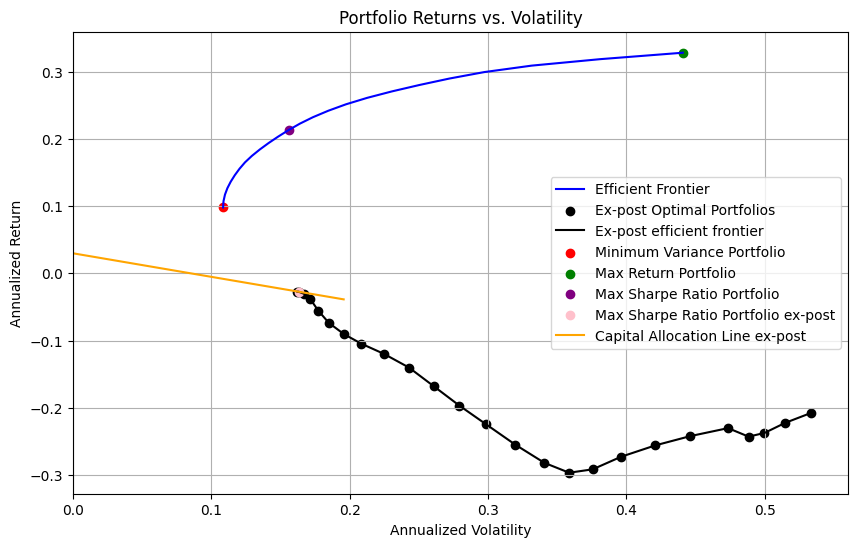

In [ ]:
#Find the index of the maximum value in the 'Ex-post Sharpe Ratio' column of the dataFrame
max_sharpe_index_expost = df_portfolio_22['Ex-post Sharpe Ratio'].idxmax()

#Get the ex-post volatility and the ex-post return of the maximum ex-post sharpe ratio portfolio
max_sharpe_volatility_expost = df_portfolio_22.loc[max_sharpe_index_expost, 'Ex-post Annualized Volatility']
max_sharpe_return_expost = df_portfolio_22.loc[max_sharpe_index_expost, 'Ex-post Annualized Returns']

#Define the boundaries of the ex-post CAL
CAL_x_expost = max_sharpe_volatility_expost * 1.2
CAL_y_expost = rfr_expected + (CAL_x_expost * (max_sharpe_return_expost - rfr_expected) / max_sharpe_volatility_expost)

#Plot the figure
#Initialize the figure
plt.figure(figsize=(10, 6))

#Plot the efficient frontier ex-ante
#plt.scatter(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Optimal Portfolios')
plt.plot(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Efficient Frontier')

#Plot the efficient frontier ex-post
plt.scatter(df_portfolio_22['Ex-post Annualized Volatility'], df_portfolio_22['Ex-post Annualized Returns'], color='black', label='Ex-post Optimal Portfolios')
plt.plot(df_portfolio_22['Ex-post Annualized Volatility'], df_portfolio_22['Ex-post Annualized Returns'], color='black', label='Ex-post efficient frontier')

#Plot the MVP, MaxRP, Max Sharpe Ratio Portfolio (ex-ante), Max Sharpe Ratio Portfolio ex-post
plt.scatter(df_frontier_high.loc[MVP_index, 'Annualized Volatility'], df_frontier_high.loc[MVP_index, 'Annualized Return'], color='red', label='Minimum Variance Portfolio')
plt.scatter(df_frontier_high.loc[MaxRP_index, 'Annualized Volatility'], df_frontier_high.loc[MaxRP_index, 'Annualized Return'], color='green', label='Max Return Portfolio')
plt.scatter(df_frontier_high.loc[max_sharpe_index, 'Annualized Volatility'], df_frontier_high.loc[max_sharpe_index, 'Annualized Return'], color='purple', label='Max Sharpe Ratio Portfolio')
plt.scatter(max_sharpe_volatility_expost, max_sharpe_return_expost, color='pink', label='Max Sharpe Ratio Portfolio ex-post')

#Plot the ex-post CAL
plt.plot([0, CAL_x_expost], [rfr_expected, CAL_y_expost], color='orange', label='Capital Allocation Line ex-post')

#Add title, legends, ect
plt.xlim(0)
plt.title('Portfolio Returns vs. Volatility')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

## Ex-ante with assets

In [ ]:
df_Assets_ret_vol = pd.DataFrame()
df_M_returns_E.mean().tolist()

[0.007858421783137615,
 0.008625643201666788,
 0.008981462331400198,
 0.011713304745927064,
 0.006840497491721603,
 0.002048042684603325,
 0.006818692112816324,
 0.008234433076073827,
 0.0068337572306001165,
 0.005132374519493851,
 0.01018661710033471,
 0.004196813064614714,
 0.011894043920415725,
 -0.0004808765179716926,
 0.007846772625563528,
 0.0003022312565818701,
 0.003912026064846706,
 0.009357027749556988,
 0.004734693140467267,
 0.011283321070325968,
 0.0026961554112294984,
 0.007465277867995351,
 0.01218211656739106,
 0.010016538767921307,
 0.007405656865665193,
 0.008754736981333715,
 -0.003501043137554638,
 0.005113077225251561,
 0.009191394310769542,
 0.003301425099951671,
 0.010089785568767327,
 0.00712029861084537,
 -0.004445734027592408,
 0.009204320187028478,
 0.014131207466221908,
 0.017665741672796487,
 0.003884465533521184,
 0.013020593602432929,
 0.011748198298529357,
 0.013313626444144584,
 0.013976938191508298,
 0.013410262203290979,
 0.009405239917785158,
 0.0110

In [ ]:
df_Assets_ret_vol['FIRMS'] = df_M_returns_E.columns.tolist()
df_Assets_ret_vol['Returns'] = df_M_returns_E.mean().tolist()
df_Assets_ret_vol['Returns'] = df_Assets_ret_vol['Returns'] *12
df_Assets_ret_vol['Volatility'] = df_M_returns_E.std().tolist()

In [ ]:
df_Assets_ret_vol

,FIRMS,Returns,Volatility
0,FLUGHAFEN WIEN,0.094301,0.092062
1,ERSTE GROUP BANK,0.103508,0.135782
2,OMV,0.107778,0.104380
3,VERBUND,0.140560,0.098217
4,WIENERBERGER,0.082086,0.123546
...,...,...,...
418,HEXAGON B,0.245529,0.115352
419,ELECTROLUX B,0.129177,0.103019
420,ATLAS COPCO A,0.198491,0.085482
421,MODERN TIMES GROUP MTG B,0.070793,0.120428


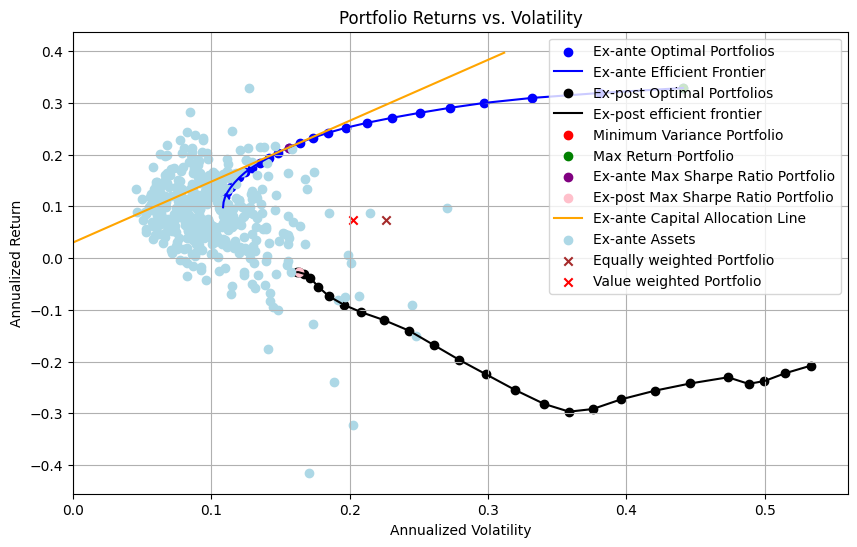

In [ ]:
#Find the index of the maximum value in the 'Ex-post Sharpe Ratio' column of the dataFrame
max_sharpe_index_expost = df_portfolio_22['Ex-post Sharpe Ratio'].idxmax()

#Get the ex-post volatility and the ex-post return of the maximum ex-post sharpe ratio portfolio
max_sharpe_volatility_expost = df_portfolio_22.loc[max_sharpe_index_expost, 'Ex-post Annualized Volatility']
max_sharpe_return_expost = df_portfolio_22.loc[max_sharpe_index_expost, 'Ex-post Annualized Returns']

#Define the boundaries of the ex-post CAL
CAL_x_expost = max_sharpe_volatility_expost * 1.2
CAL_y_expost = rfr_expected + (CAL_x_expost * (max_sharpe_return_expost - rfr_expected) / max_sharpe_volatility_expost)

#Plot the figure
#Initialize the figure
plt.figure(figsize=(10, 6))

#Plot the efficient frontier ex-ante
plt.scatter(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Ex-ante Optimal Portfolios')
plt.plot(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Ex-ante Efficient Frontier')

#Plot the efficient frontier ex-post
plt.scatter(df_portfolio_22['Ex-post Annualized Volatility'], df_portfolio_22['Ex-post Annualized Returns'], color='black', label='Ex-post Optimal Portfolios')
plt.plot(df_portfolio_22['Ex-post Annualized Volatility'], df_portfolio_22['Ex-post Annualized Returns'], color='black', label='Ex-post efficient frontier')

#Plot the MVP, MaxRP, Max Sharpe Ratio Portfolio (ex-ante), Max Sharpe Ratio Portfolio ex-post
plt.scatter(df_frontier_high.loc[MVP_index, 'Annualized Volatility'], df_frontier_high.loc[MVP_index, 'Annualized Return'], color='red', label='Minimum Variance Portfolio')
plt.scatter(df_frontier_high.loc[MaxRP_index, 'Annualized Volatility'], df_frontier_high.loc[MaxRP_index, 'Annualized Return'], color='green', label='Max Return Portfolio')
plt.scatter(df_frontier_high.loc[max_sharpe_index, 'Annualized Volatility'], df_frontier_high.loc[max_sharpe_index, 'Annualized Return'], color='purple', label='Ex-ante Max Sharpe Ratio Portfolio')
plt.scatter(max_sharpe_volatility_expost, max_sharpe_return_expost, color='pink', label='Ex-post Max Sharpe Ratio Portfolio')

#Plot the ex-ante CAL
plt.plot([0, CAL_x], [rfr_expected, CAL_y], color='orange', label='Ex-ante Capital Allocation Line')

#Plot the assets ex-ante
plt.scatter(df_Assets_ret_vol['Volatility'], df_Assets_ret_vol['Returns'], color='lightblue', label='Ex-ante Assets')

#Plot the Equally weighted and Value weighted portfolios
plt.scatter(portfolio_vol_EW, EW_returns_avrg_ann, marker='x', color='brown', label='Equally weighted Portfolio')
plt.scatter(portfolio_vol_VW, VW_returns_avrg_ann, marker='x', color='red', label='Value weighted Portfolio')

#Add title, legends, ect
plt.xlim(0)
plt.title('Portfolio Returns vs. Volatility')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

## Ex-post with assets

In [ ]:
df_assets_ret_vol = pd.DataFrame()
df_M_returns_22_E.mean().tolist()

[0.013182078766785501,
 -0.019594694843020465,
 0.0036506777772245536,
 -0.01857776667836915,
 -0.02622171999158694,
 -0.007778749524676822,
 -0.009336220741257978,
 -0.013491669360508274,
 -0.053188543224793106,
 -0.005551303464432611,
 -0.011287559781715787,
 -0.04053682422848225,
 -0.05642880667704033,
 -0.016048828614345867,
 -0.02494765019087451,
 -0.03195889595649973,
 -0.023972066285234035,
 -0.00047941978287801185,
 -0.0042032502728185555,
 -0.0013101829988590812,
 -0.030753367665478232,
 0.0019654356664888426,
 -0.018544048232058453,
 0.012836190824894261,
 0.00655750762660499,
 -0.020211262892031012,
 -0.08338256997509991,
 -0.028082633282433406,
 -0.01919275765698968,
 0.007931557300831837,
 -0.010761615635365837,
 -0.0006772841096688298,
 -0.032002165280043765,
 0.0005079173288425979,
 -0.032642290562431155,
 -0.038292885968574,
 0.011553279685123688,
 -0.0076275003330187234,
 -0.02824034011560561,
 -0.020008082268761485,
 -0.019838656052267378,
 -0.04030230515571782,
 -0.0

In [ ]:
df_assets_ret_vol['FIRMS'] = df_M_returns_22_E.columns.tolist()
df_assets_ret_vol['Returns'] = df_M_returns_22_E.mean().tolist()
df_assets_ret_vol['Returns'] = df_assets_ret_vol['Returns'] *12
df_assets_ret_vol['Volatility'] = df_M_returns_22_E.std().tolist()

In [ ]:
df_assets_ret_vol

,FIRMS,Returns,Volatility
0,FLUGHAFEN WIEN,0.158185,0.070936
1,ERSTE GROUP BANK,-0.235136,0.130134
2,OMV,0.043808,0.134169
3,VERBUND,-0.222933,0.101791
4,WIENERBERGER,-0.314661,0.112091
...,...,...,...
418,HEXAGON B,-0.346041,0.098745
419,ELECTROLUX B,-0.432390,0.113413
420,ATLAS COPCO A,-0.248865,0.130516
421,MODERN TIMES GROUP MTG B,0.296698,0.187505


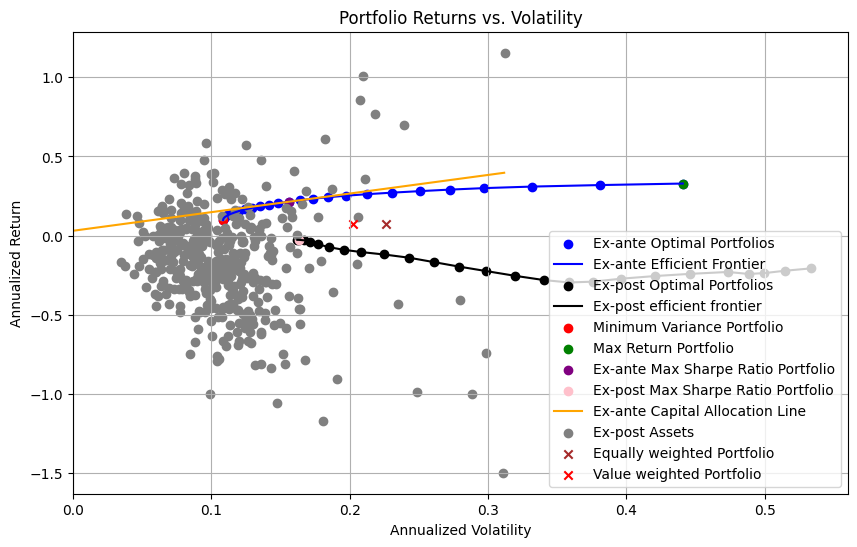

In [ ]:
#Find the index of the maximum value in the 'Ex-post Sharpe Ratio' column of the dataFrame
max_sharpe_index_expost = df_portfolio_22['Ex-post Sharpe Ratio'].idxmax()

#Get the ex-post volatility and the ex-post return of the maximum ex-post sharpe ratio portfolio
max_sharpe_volatility_expost = df_portfolio_22.loc[max_sharpe_index_expost, 'Ex-post Annualized Volatility']
max_sharpe_return_expost = df_portfolio_22.loc[max_sharpe_index_expost, 'Ex-post Annualized Returns']

#Define the boundaries of the ex-post CAL
CAL_x_expost = max_sharpe_volatility_expost * 1.2
CAL_y_expost = rfr_expected + (CAL_x_expost * (max_sharpe_return_expost - rfr_expected) / max_sharpe_volatility_expost)

#Plot the figure
#Initialize the figure
plt.figure(figsize=(10, 6))

#Plot the efficient frontier ex-ante
plt.scatter(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Ex-ante Optimal Portfolios')
plt.plot(df_frontier_high['Annualized Volatility'], df_frontier_high['Annualized Return'], color='blue', label='Ex-ante Efficient Frontier')

#Plot the efficient frontier ex-post
plt.scatter(df_portfolio_22['Ex-post Annualized Volatility'], df_portfolio_22['Ex-post Annualized Returns'], color='black', label='Ex-post Optimal Portfolios')
plt.plot(df_portfolio_22['Ex-post Annualized Volatility'], df_portfolio_22['Ex-post Annualized Returns'], color='black', label='Ex-post efficient frontier')

#Plot the MVP, MaxRP, Max Sharpe Ratio Portfolio (ex-ante), Max Sharpe Ratio Portfolio ex-post
plt.scatter(df_frontier_high.loc[MVP_index, 'Annualized Volatility'], df_frontier_high.loc[MVP_index, 'Annualized Return'], color='red', label='Minimum Variance Portfolio')
plt.scatter(df_frontier_high.loc[MaxRP_index, 'Annualized Volatility'], df_frontier_high.loc[MaxRP_index, 'Annualized Return'], color='green', label='Max Return Portfolio')
plt.scatter(df_frontier_high.loc[max_sharpe_index, 'Annualized Volatility'], df_frontier_high.loc[max_sharpe_index, 'Annualized Return'], color='purple', label='Ex-ante Max Sharpe Ratio Portfolio')
plt.scatter(max_sharpe_volatility_expost, max_sharpe_return_expost, color='pink', label='Ex-post Max Sharpe Ratio Portfolio')

#Plot the ex-ante CAL
plt.plot([0, CAL_x], [rfr_expected, CAL_y], color='orange', label='Ex-ante Capital Allocation Line')

#Plot the assets ex-post
plt.scatter(df_assets_ret_vol['Volatility'], df_assets_ret_vol['Returns'], color='grey', label='Ex-post Assets')

#Plot the Equally weighted and Value weighted portfolios
plt.scatter(portfolio_vol_EW, EW_returns_avrg_ann, marker='x', color='brown', label='Equally weighted Portfolio')
plt.scatter(portfolio_vol_VW, VW_returns_avrg_ann, marker='x', color='red', label='Value weighted Portfolio')

#Add title, legends, ect
plt.xlim(0)
plt.title('Portfolio Returns vs. Volatility')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

## Additional questions

In [ ]:
#Ex-ante sharpe ratio performance comparaison
df_frontier_high['Sharpe Ratio']
#The best portfolio has a sharpe ratio of 0.988571 which indicates that for every unit of risk taken, the portfolio generated 0.988571 units of return in excess of the risk-free rate.
#a sharpe ratio arround one is consider to be acceptable to good since the investment return is about the same as the volatility.

0     0.628239
1     0.714519
2     0.795069
3     0.868623
4     0.934549
5     0.993258
6     1.044943
7     1.088582
8     1.120973
9     1.144266
10    1.160600
11    1.171120
12    1.176847
13    1.176694
14    1.167941
15    1.149979
16    1.124038
17    1.088246
18    1.045534
19    1.000406
20    0.955978
21    0.907320
22    0.842663
23    0.758653
24    0.677468
Name: Sharpe Ratio, dtype: float64

In [ ]:
#Ex-post sharpe ratio performance comparaison
df_portfolio_22['Ex-post Sharpe Ratio']
#the best sharpe ratio portfolio is number 6 with -0.029930.  It's a negative value that indiactes that the investment's return is below the risk-free rate, indicating a poor risk-adjusted performance.

0    -0.352443
1    -0.350686
2    -0.360596
3    -0.398980
4    -0.482789
5    -0.560595
6    -0.614595
7    -0.645851
8    -0.666421
9    -0.700576
10   -0.758761
11   -0.811979
12   -0.852495
13   -0.891378
14   -0.915668
15   -0.911069
16   -0.856397
17   -0.764926
18   -0.679775
19   -0.609860
20   -0.549831
21   -0.559087
22   -0.535226
23   -0.490911
24   -0.445695
Name: Ex-post Sharpe Ratio, dtype: float64

In [ ]:
#Compare and comment the performance of the equally-weighted, value-weighted, and efficient portfolios over the same sample period.
print('equally weighted portfolio sharpe ratio', sr_ev)
print('value weighted weighted portfolio sharpe ratio', sr_vw)
print('efficient portfolios sharpe ratio', max_sharpe_excess_return)
#Seems very unlikely

equally weighted portfolio sharpe ratio 0.1973869030924826
value weighted weighted portfolio sharpe ratio 0.2128443638484298
value weighted weighted portfolio sharpe ratio 0.18343398633923208


# Question  4

In [ ]:
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/ex_2/df_EUR_monthly_RI.csv')

In [ ]:
# get the return interests to calculate portfolio returns
df_EUR_M_RI = df_EUR_M_RI.iloc[:, 4:]

In [ ]:
df_transposed = df_EUR_M_RI.transpose().reset_index()

# Set the column names to be the values from the second row
df_transposed.columns = df_transposed.iloc[0]

# Drop the second row which now contains the original column names
df_transposed = df_transposed.drop(0)

# Reset the index
df_transposed = df_transposed.reset_index(drop=True)


df_transposed = df_transposed.rename(columns={'NAME': 'DATE'})

df_transposed= df_transposed[['DATE'] + [col for col in df_transposed.columns if col in firms_list]]


In [ ]:
df_transposed.iloc[:, 0] = pd.to_datetime(df_transposed.iloc[:, 0])

# Change the other columns to float
df_transposed.iloc[:, 1:] = df_transposed.iloc[:, 1:].astype(float)


<ipython-input-105-99380c8154f4>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_transposed.iloc[:, 0] = pd.to_datetime(df_transposed.iloc[:, 0])
<ipython-input-105-99380c8154f4>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_transposed.iloc[:, 1:] = df_transposed.iloc[:, 1:].astype(float)


In [ ]:
exp_returns = pd.DataFrame()
exp_returns['FIRMS'] = None
exp_returns['RETURNS'] = 0

In [ ]:
df_transposed_08 =  df_transposed[df_transposed['DATE'] < pd.Timestamp('2008-01-01')]

In [ ]:
exp_returns['FIRMS'] =  df_transposed.columns.tolist()[1:]
exp_returns['RETURNS'] = df_transposed.iloc[:, 1:].pct_change().mean().tolist()
exp_returns

,FIRMS,RETURNS
0,FLUGHAFEN WIEN,0.011161
1,ERSTE GROUP BANK,0.013393
2,OMV,0.014295
3,VERBUND,0.013558
4,WIENERBERGER,0.009058
...,...,...
418,HEXAGON B,0.022688
419,ELECTROLUX B,0.009853
420,ATLAS COPCO A,0.017372
421,MODERN TIMES GROUP MTG B,0.009320


In [ ]:
df_transposed.set_index("DATE", inplace=True)

In [ ]:
window=96
Covar=df_transposed.pct_change().rolling(window).cov()

In [ ]:
cov_m = Covar.loc["2008-01-31"]
cov_m

,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,HOLMEN B,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
0,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.004125,0.002375,0.002449,0.002799,0.002050,0.001290,0.002290,0.001821,0.000853,0.001328,...,0.001846,0.001459,0.002808,0.002381,0.000642,0.002452,0.001875,0.001826,0.002177,0.003774
ERSTE GROUP BANK,0.002375,0.004986,0.001841,0.002556,0.002423,0.001003,0.002742,0.001853,0.001344,0.002037,...,0.001297,0.001471,0.001882,0.001893,0.001711,0.002415,0.001643,0.001117,0.001530,0.001939
OMV,0.002449,0.001841,0.007851,0.002915,0.002309,0.001209,0.003042,0.001830,0.000859,0.000831,...,0.002253,0.001367,0.003655,0.002116,0.000778,0.002572,0.001755,0.002017,0.002965,0.006322
VERBUND,0.002799,0.002556,0.002915,0.006502,0.002112,0.002058,0.001772,0.002146,0.001146,0.001662,...,0.001090,0.000827,0.002084,0.001737,0.001173,0.002311,0.000720,0.000784,0.002928,0.002985
WIENERBERGER,0.002050,0.002423,0.002309,0.002112,0.005933,0.001324,0.002303,0.002367,0.001211,0.001862,...,0.002305,0.002152,0.002471,0.002317,0.001126,0.003297,0.002732,0.001915,0.001484,0.002831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,0.002452,0.002415,0.002572,0.002311,0.003297,0.000698,0.003452,0.002699,0.000619,0.002580,...,0.003346,0.002268,0.004998,0.004479,0.000812,0.009246,0.003863,0.004329,0.004553,0.005062
ELECTROLUX B,0.001875,0.001643,0.001755,0.000720,0.002732,0.000232,0.002913,0.002036,0.000843,0.001556,...,0.003778,0.001989,0.004827,0.004026,-0.000041,0.003863,0.009491,0.005960,0.005393,0.005145
ATLAS COPCO A,0.001826,0.001117,0.002017,0.000784,0.001915,0.000522,0.002833,0.001789,0.000148,0.001442,...,0.004723,0.002192,0.007701,0.005002,0.000428,0.004329,0.005960,0.009702,0.006365,0.007218


In [ ]:
bounds = tuple((0, 1) for asset in range(len(exp_returns)))

In [ ]:
from scipy.optimize import minimize

def cons():
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
    bounds = tuple((0, 1) for asset in range(len(exp_returns)))
    in_weights = np.ones(len(exp_returns)) / len(exp_returns)
    return constraints, bounds, in_weights

constraints, bounds, in_weights = cons()

def objective_function(weights,cov_m):
    return weights.T @ cov_m @ weights

def optimal_portfolio(weights,cov):
    x = minimize(
    objective_function,
    in_weights,
    cov_m,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints)
    return x

optimal_portfolio(in_weights,cov_m)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00041494938151633953
       x: [ 2.895e-19  2.597e-18 ...  3.624e-20  1.984e-18]
     nit: 34
     jac: [ 1.432e-03  1.638e-03 ...  2.522e-03  2.347e-03]
    nfev: 14417
    njev: 34

## Rolling Window

In [ ]:
# Define the start and end years for the rolling window + initial weight df
start_year = 2000
end_year = 2022

returns = df_transposed.pct_change()
optimal_weights_df = pd.DataFrame()

# Loop over each year from the end of 2007 to the end of 2022
for year in range(2007, end_year + 1):
    start_date = f"{year - 7}-12-31"
    end_date = f"{year}-12-31"

    filtered_rows = returns.loc[(returns.index >= start_date) & (returns.index <= end_date)]

    # Calculate the expected returns for the current rolling window
    ER = filtered_rows.mean(axis=1)
    ER = ER.to_frame(name=f'expected_returns_{year}')

    # Calculate the covariance matrix for the current rolling window
    transposed_df = filtered_rows.T
    transposed_df = transposed_df.astype(float)
    CM = transposed_df.cov()

    optimal_weights_df[f'Weights_{year}'] = optimal_portfolio(in_weights,CM).x

## Ex-Post Returns

In [ ]:
portfolio_returns = []

for year in range(2007, end_year):
    # Weights at the end of year Y
    weights = optimal_weights_df[f'Weights_{year}'].values
    updated_weights = weights.copy()

    # Returns for each month of year Y + 1
    for month in range(1, 13):
        month_index = f"{year + 1}-{str(month).zfill(2)}"
        if month_index not in returns.columns:
            continue

        # Calculate the portfolio return for the current month
        monthly_stock_returns = returns[month_index].values
        portfolio_return = np.dot(updated_weights, monthly_stock_returns)
        portfolio_returns.append(portfolio_return)

        # Update and normalize the weights for the next month
        updated_weights = updated_weights * (1 + monthly_stock_returns)
        updated_weights /= (1 + portfolio_return)

ex_post_ret = exp_returns.copy()
ex_post_ret['RETURNS'] = updated_weights

ex_post_ret

,FIRMS,RETURNS
0,FLUGHAFEN WIEN,2.895331e-19
1,ERSTE GROUP BANK,2.596743e-18
2,OMV,3.883462e-19
3,VERBUND,0.000000e+00
4,WIENERBERGER,0.000000e+00
...,...,...
418,HEXAGON B,0.000000e+00
419,ELECTROLUX B,3.172993e-19
420,ATLAS COPCO A,0.000000e+00
421,MODERN TIMES GROUP MTG B,3.623576e-20


## Portfolio statistics

In [ ]:

average_return = ex_post_ret['RETURNS'].mean() * 12
volatility = ex_post_ret['RETURNS'].std() * np.sqrt(12)

rf_rate = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')

In [ ]:
# Sharpe ratio with average EUR annualized risk free ratio from OECD euro zone
rfr = rf_rate.OBS_VALUE
avg_rfr = rfr.mean()/100 # average annual risk free rate across all european countries over the 2000 - 2022 period

In [ ]:
#calculate the sharpe ratio with excess returns wrt average risk free rate
sharpe_ratio = (average_return - avg_rfr) / volatility

# Calculate the minimum and maximum return
min_return = ex_post_ret['RETURNS'].min()
max_return = ex_post_ret['RETURNS'].max()

from tabulate import tabulate

results = {
    "Annualized Average Return": average_return,
    "Annualized Volatility": volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Minimum Return": min_return,
    "Maximum Return": max_return
}

table = []
for key, value in results.items():
    table.append([key, value])

print(tabulate(table, headers=["Out-of-Sample", "Value"]))


Out-of-Sample                   Value
-------------------------  ----------
Annualized Average Return   0.0283688
Annualized Volatility       0.0431591
Sharpe Ratio               -0.0258525
Minimum Return              0
Maximum Return              0.142496


In [ ]:
from tabulate import tabulate

# Out of sample results
results = {
    "Annualized Average Return": average_return,
    "Annualized Volatility": volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Minimum Return": min_return,
    "Maximum Return": max_return
}

# Value Weighted results
results_vw = {
    "Annualized Average Return": portfolio_returns_VW.mean(),
    "Annualized Volatility": portfolio_vol_VW,
    "Sharpe Ratio": sr_vw,
    "Minimum Return": portfolio_returns_VW.min(),
    "Maximum Return": portfolio_returns_VW.max()
}

table_data = []
for key in results.keys():
    table_data.append([key, results[key], results_vw[key]])
print(tabulate(table_data, headers=["Metric", "Out of Sample Portfolio", "Value Weighted Portfolio"]))

Metric                       Out of Sample Portfolio    Value Weighted Portfolio
-------------------------  -------------------------  --------------------------
Annualized Average Return                  0.0283688                  0.00657006
Annualized Volatility                      0.0431591                  0.202721
Sharpe Ratio                              -0.0258525                  0.212844
Minimum Return                             0                         -0.215922
Maximum Return                             0.142496                   0.223728


### Additional data for questions

In [ ]:
df_frontier_high_avg_return = df_frontier_high['Annualized Return'].mean()

In [ ]:
df_frontier_high_avg_vol = df_frontier_high['Annualized Volatility'].mean()

In [ ]:
df_frontier_high_avg_sr = df_frontier_high['Sharpe Ratio'].mean()

In [ ]:
print(df_frontier_high_avg_return, df_frontier_high_avg_vol, df_frontier_high_avg_sr)

0.21333088661195937 0.19046831450446128 0.9894602456914688


In [ ]:
print(df_frontier_high['Annualized Return'].min(),df_frontier_high['Annualized Return'].max())

0.09809128022183558 0.3285704930020832
